In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('SIH Skill Loom.xlsx')
df

,Job Role,Skills,Experience/Eligibility,Target_Students,Domain
0,Data Analyst,"Python, SQL, Excel, Pandas, NumPy, Data Cleani...",0–2 yrs,College,Technical
1,AI/ML Intern,"Python, TensorFlow, PyTorch, Scikit-learn, Num...",0–2 yrs,College,Technical
2,Software Developer,"Java, C++, Python, Git, Debugging, OOP Concept...",0–2 yrs,College,Technical
3,Web Developer,"HTML, CSS, JavaScript, React, Node.js, Bootstr...",0–2 yrs,College,Technical
4,Cloud Engineer,"AWS Basics, Azure, GCP, Linux, Networking, Sec...",0–2 yrs,College,Technical
...,...,...,...,...,...
295,Robotics Research Intern,"Arduino, Sensors, Python/C++, Data Logging, Pr...",0–2 yrs,College,Technical
296,AI Research Intern,"Python, TensorFlow, Scikit-learn, Data Analysi...",0–2 yrs,College,Technical/Research
297,Machine Learning Intern,"Python, Data Analysis, Regression, Classificat...",0–2 yrs,College,Technical
298,Environmental Data Analyst Intern,"Data Analysis, GIS Basics, Excel, Reporting, R...",College,Research/Environment,NaN


## Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Job Role                300 non-null    object
 1   Skills                  300 non-null    object
 2   Experience/Eligibility  300 non-null    object
 3   Target_Students         300 non-null    object
 4   Domain                  298 non-null    object
dtypes: object(5)
memory usage: 11.8+ KB


In [4]:
df.dropna(inplace=True)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df["skills"] = df["Skills"].fillna("")

In [7]:
df

,Job Role,Skills,Experience/Eligibility,Target_Students,Domain,skills
0,Data Analyst,"Python, SQL, Excel, Pandas, NumPy, Data Cleani...",0–2 yrs,College,Technical,"Python, SQL, Excel, Pandas, NumPy, Data Cleani..."
1,AI/ML Intern,"Python, TensorFlow, PyTorch, Scikit-learn, Num...",0–2 yrs,College,Technical,"Python, TensorFlow, PyTorch, Scikit-learn, Num..."
2,Software Developer,"Java, C++, Python, Git, Debugging, OOP Concept...",0–2 yrs,College,Technical,"Java, C++, Python, Git, Debugging, OOP Concept..."
3,Web Developer,"HTML, CSS, JavaScript, React, Node.js, Bootstr...",0–2 yrs,College,Technical,"HTML, CSS, JavaScript, React, Node.js, Bootstr..."
4,Cloud Engineer,"AWS Basics, Azure, GCP, Linux, Networking, Sec...",0–2 yrs,College,Technical,"AWS Basics, Azure, GCP, Linux, Networking, Sec..."
...,...,...,...,...,...,...
290,School Aeronautical Club,"Flight Basics, Model Planes, Creativity, Obser...",0–2 yrs,School,Aeronautical,"Flight Basics, Model Planes, Creativity, Obser..."
291,School Robotics & Coding,"Arduino Basics, Sensors, Logical Thinking, Pro...",0–2 yrs,School,Technical,"Arduino Basics, Sensors, Logical Thinking, Pro..."
292,School AI/ML Club,"Python Basics, Logical Thinking, Problem Solving",0–2 yrs,School,Technical,"Python Basics, Logical Thinking, Problem Solving"
293,Renewable Energy Intern,"Solar, Wind, MATLAB, Data Analysis, Reporting",0–2 yrs,College,Electrical/Renewable,"Solar, Wind, MATLAB, Data Analysis, Reporting"


## Data Cleaning

In [8]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")
print(df.columns.tolist())

['job_role', 'skills', 'experience/eligibility', 'target_students', 'domain', 'skills']


In [9]:
df = df.loc[:, ~df.columns.duplicated()]

print(df.columns)

Index(['job_role', 'skills', 'experience/eligibility', 'target_students',
       'domain'],
      dtype='object')


In [10]:
df.head()

,job_role,skills,experience/eligibility,target_students,domain
0,Data Analyst,"Python, SQL, Excel, Pandas, NumPy, Data Cleani...",0–2 yrs,College,Technical
1,AI/ML Intern,"Python, TensorFlow, PyTorch, Scikit-learn, Num...",0–2 yrs,College,Technical
2,Software Developer,"Java, C++, Python, Git, Debugging, OOP Concept...",0–2 yrs,College,Technical
3,Web Developer,"HTML, CSS, JavaScript, React, Node.js, Bootstr...",0–2 yrs,College,Technical
4,Cloud Engineer,"AWS Basics, Azure, GCP, Linux, Networking, Sec...",0–2 yrs,College,Technical


## Graph For missing values

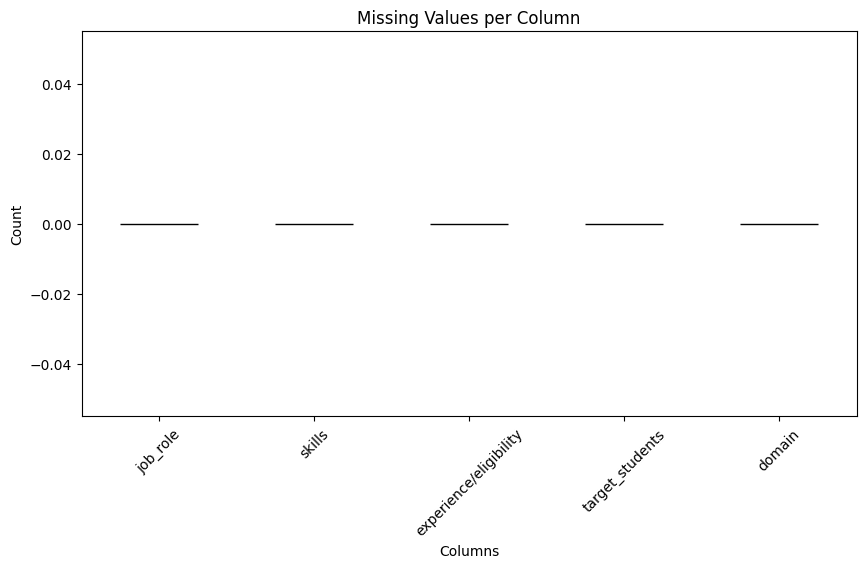

In [11]:
plt.figure(figsize=(10,5))
df.isnull().sum().plot(kind='bar', color='red', edgecolor='black')
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.show()

/var/folders/sx/lzmwqx7x329_brmz56xy28880000gn/T/ipykernel_2322/1027543730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_role_counts.index, y=job_role_counts.values, palette="viridis")


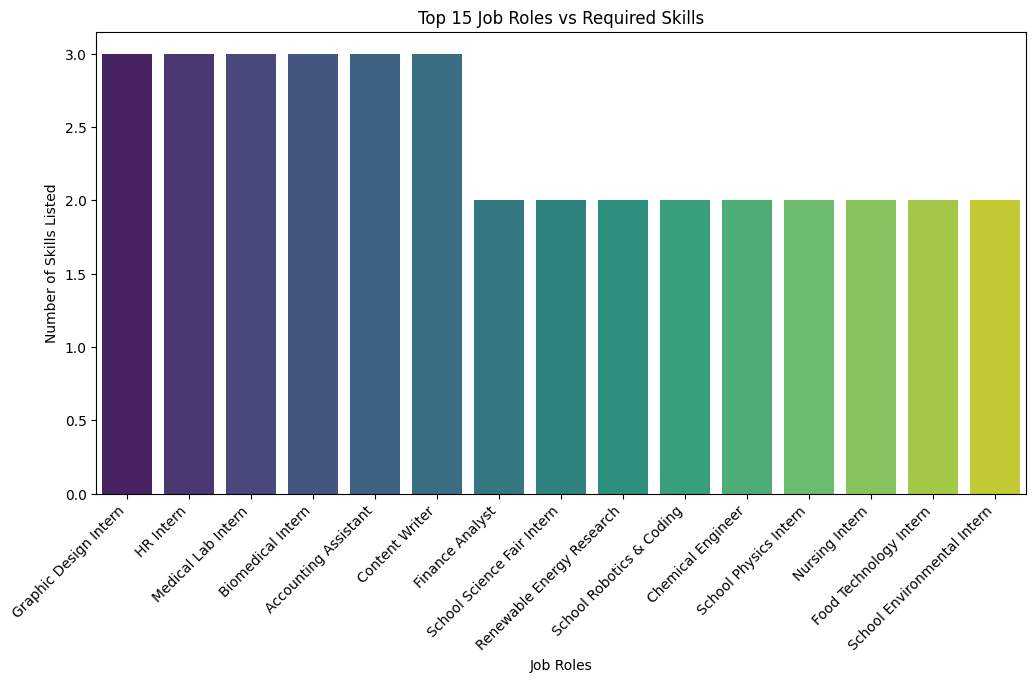

In [12]:
if "job_role" in df.columns and "skills" in df.columns:
    plt.figure(figsize=(12,6))
    job_role_counts = df.groupby("job_role")["skills"].count().sort_values(ascending=False)
    top_n = 15
    job_role_counts = job_role_counts[:top_n]
    sns.barplot(x=job_role_counts.index, y=job_role_counts.values, palette="viridis")
    plt.xticks(rotation=45, ha="right")
    plt.xlabel("Job Roles")
    plt.ylabel("Number of Skills Listed")
    plt.title(f"Top {top_n} Job Roles vs Required Skills")
    plt.show()
else:
    print("Columns 'job_role' or 'skills' not found in dataset. Available columns:", df.columns)


## Tokenization

In [13]:
from sentence_transformers import SentenceTransformer


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/homebrew/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/homebrew/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/homebrew/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/opt/homebrew/lib/python3.11/site-pack

In [14]:
text_columns = ["skills", "job_role", "target_students"]
for col in text_columns:
    df[col] = df[col].astype(str).fillna("")
model = SentenceTransformer('all-MiniLM-L6-v2')
for col in text_columns:
    print(f"Tokenizing {col}....")
    df[f"{col}_embedding"] = model.encode(df[col]. tolist(), batch_size=32, show_progress_bar = True).tolist()
df.to_csv("final_skill_loom.csv", index=False)

/var/folders/sx/lzmwqx7x329_brmz56xy28880000gn/T/ipykernel_2322/3816043357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).fillna("")
/var/folders/sx/lzmwqx7x329_brmz56xy28880000gn/T/ipykernel_2322/3816043357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).fillna("")
/var/folders/sx/lzmwqx7x329_brmz56xy28880000gn/T/ipykernel_2322/3816043357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

Tokenizing skills....


Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Tokenizing job_role....


Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Tokenizing target_students....


Batches:   0%|          | 0/9 [00:00<?, ?it/s]

## User input and Prediction

In [15]:
#1. TF-IDF vectorizer on skills column
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
'''tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['skills'])'''

"tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)\ntfidf_matrix = tfidf_vectorizer.fit_transform(df['skills'])"

In [17]:
'''# 2. Encode user input skills
user_skills = "javascript, python"
user_tfidf = tfidf_vectorizer.transform([user_skills])
'''

'# 2. Encode user input skills\nuser_skills = "javascript, python"\nuser_tfidf = tfidf_vectorizer.transform([user_skills])\n'

In [19]:
#3. Compute cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores_tfidf = cosine_similarity(user_tfidf, tfidf_matrix)[0]

NameError: name 'user_tfidf' is not defined

In [ ]:
'''
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Ensure skills column is string
df['skills'] = df['skills'].astype(str)

# -----------------------------
# 1. SBERT Embeddings Similarity
# -----------------------------
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
job_embeddings = sbert_model.encode(df["skills"].tolist(), convert_to_tensor=True)

user_skills = "Python, TensorFlow, PyTorch, Scikit-learn, NumPy, Pandas, Data Preprocessing, Feature Engineering, Model Evaluation, Machine Learning Algorithms, Deep Learning, Neural Networks, Data Visualization, Problem Solving"
user_embedding = sbert_model.encode([user_skills], convert_to_tensor=True)

similarity_scores = cosine_similarity(user_embedding.cpu().numpy(), job_embeddings.cpu().numpy())[0]
df["similarity_score"] = similarity_scores * 100

# -----------------------------
# 2. TF-IDF Similarity
# -----------------------------
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['skills'])

user_tfidf = tfidf_vectorizer.transform([user_skills])
similarity_scores_tfidf = cosine_similarity(user_tfidf, tfidf_matrix)[0]
df["similarity_score_tfidf"] = similarity_scores_tfidf * 100

# -----------------------------
# 3. Combine Similarities
# -----------------------------
df['final_similarity'] = 0.6 * df['similarity_score'] + 0.4 * df['similarity_score_tfidf']

# -----------------------------
# 4. Multi-word skills & missing skills
# -----------------------------
multi_word_skills = [
    'Machine Learning', 'Deep Learning', 'Data Preprocessing', 'Feature Engineering',
    'Model Evaluation', 'Neural Networks', 'Data Visualization', 'Problem Solving',
    'TensorFlow', 'PyTorch', 'Scikit-learn', 'NumPy', 'Pandas'
]



def normalize_skills(skill_string):
    skill_string = skill_string.lower().strip()
    for skill in multi_word_skills:
        skill_string = skill_string.replace(skill.lower(), skill.lower().replace(" ", "_"))
    skill_list = [skill.strip() for skill in skill_string.replace(",", " ").split()]
    skill_list = [skill.replace("_", " ") for skill in skill_list]
    return set(skill_list)

def get_missing_skills(user_skills, job_skills):
    user_skill_set = normalize_skills(user_skills)
    job_skill_set = normalize_skills(job_skills)
    missing_skills = job_skill_set - user_skill_set
    return ", ".join(missing_skills)

# -----------------------------
# 5. Top Job Recommendations
# -----------------------------
top_jobs = df.sort_values(by='final_similarity', ascending=False).head(10)
top_jobs["missing_skills"] = top_jobs["skills"].apply(lambda x: get_missing_skills(user_skills, x))

print(top_jobs[["job_role", "final_similarity", "missing_skills"]])
'''


'\nfrom sentence_transformers import SentenceTransformer\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.metrics.pairwise import cosine_similarity\nimport pandas as pd\n\n# Ensure skills column is string\ndf[\'skills\'] = df[\'skills\'].astype(str)\n\n# -----------------------------\n# 1. SBERT Embeddings Similarity\n# -----------------------------\nsbert_model = SentenceTransformer(\'all-MiniLM-L6-v2\')\njob_embeddings = sbert_model.encode(df["skills"].tolist(), convert_to_tensor=True)\n\nuser_skills = "Python, TensorFlow, PyTorch, Scikit-learn, NumPy, Pandas, Data Preprocessing, Feature Engineering, Model Evaluation, Machine Learning Algorithms, Deep Learning, Neural Networks, Data Visualization, Problem Solving"\nuser_embedding = sbert_model.encode([user_skills], convert_to_tensor=True)\n\nsimilarity_scores = cosine_similarity(user_embedding.cpu().numpy(), job_embeddings.cpu().numpy())[0]\ndf["similarity_score"] = similarity_scores * 100\n\n# -------------

In [20]:

# -----------------------------
# 1. Multi-word skills for normalization
# -----------------------------
multi_word_skills = [
    'Machine Learning', 'Deep Learning', 'Data Preprocessing', 'Feature Engineering',
    'Model Evaluation', 'Neural Networks', 'Data Visualization', 'Problem Solving',
    'TensorFlow', 'PyTorch', 'Scikit-learn', 'NumPy', 'Pandas'
]

def normalize_skills(skill_string):
    skill_string = skill_string.lower().strip()
    for skill in multi_word_skills:
        skill_string = skill_string.replace(skill.lower(), skill.lower().replace(" ", "_"))
    skill_list = [s.strip() for s in skill_string.replace(",", " ").split()]
    skill_list = [s.replace("_", " ") for s in skill_list]
    return " ".join(skill_list)  # Return as string for TF-IDF and embedding

# Apply normalization
df['skills_normalized'] = df['skills'].apply(normalize_skills)

# -----------------------------
# 2. SBERT Embeddings
# -----------------------------
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
job_embeddings = sbert_model.encode(df["skills_normalized"].tolist(), convert_to_tensor=True)

# -----------------------------
# 3. TF-IDF Similarity
# -----------------------------
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['skills_normalized'])

# -----------------------------
# 4. User Input
# -----------------------------
user_skills = " Scikit-learn, NumPy, Pandas, Data Preprocessing, Feature Engineering, Model Evaluation, Machine Learning, Deep Learning, Neural Networks, Data Visualization, Problem Solving"
user_normalized = normalize_skills(user_skills)

# SBERT embedding
user_embedding = sbert_model.encode([user_normalized], convert_to_tensor=True)
similarity_scores_sbert = cosine_similarity(user_embedding.cpu().numpy(), job_embeddings.cpu().numpy())[0]

# TF-IDF similarity
user_tfidf = tfidf_vectorizer.transform([user_normalized])
similarity_scores_tfidf = cosine_similarity(user_tfidf, tfidf_matrix)[0]

# -----------------------------
# 5. Combine Similarities
# -----------------------------
df['similarity_score'] = similarity_scores_sbert * 100
df['similarity_score_tfidf'] = similarity_scores_tfidf * 100
df['final_similarity'] = 0.6 * df['similarity_score'] + 0.4 * df['similarity_score_tfidf']

# -----------------------------
# 6. Missing Skills
# -----------------------------
def get_missing_skills(user_skills, job_skills):
    user_set = set(user_skills.lower().replace(",", " ").split())
    job_set = set(job_skills.lower().replace(",", " ").split())
    missing = job_set - user_set
    return ", ".join(missing)
def get_matched_skills(user_skills, job_skills):
    user_set = set(user_skills.lower().replace(",", " ").split())
    job_set = set(job_skills.lower().replace(",", " ").split())
    matched = job_set & user_set
    return ", ".join(matched)


top_jobs = df.sort_values(by='final_similarity', ascending=False).head(10)
top_jobs["missing_skills"] = top_jobs["skills"].apply(lambda x: get_missing_skills(user_skills, x))
top_jobs["matched_skills"] = top_jobs["skills"].apply(lambda x: get_matched_skills(user_skills, x))
# -----------------------------
# 7. Show Recommendations
# -----------------------------
print(top_jobs[["job_role", "final_similarity", "matched_skills", "missing_skills"]])


                      job_role  final_similarity  \
1                 AI/ML Intern         93.621489   
50   Machine Learning Engineer         62.877493   
44       AI/ML Research Intern         61.361518   
52              Data Scientist         53.449269   
215         AI Research Intern         49.942769   
166               AI/ML Intern         48.026292   
0                 Data Analyst         42.125151   
51                NLP Engineer         35.837378   
106         AI Research Intern         32.508101   
216    Machine Learning Intern         30.354652   

                                        matched_skills  \
1    evaluation, numpy, networks, solving, deep, da...   
50   evaluation, numpy, solving, data, feature, mod...   
44   evaluation, solving, deep, data, model, machin...   
52   solving, numpy, data, pandas, visualization, m...   
215                                 data, scikit-learn   
166                                 data, scikit-learn   
0    solving, numpy, 